In [ ]:

# The aim of this project is to use the breast cancer data set from the sklearn library in python and find the right algorithm 
# that will have the best performance. This is a classification problem so different classificaction algorithms will be tested.


In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

df['target'] = cancer_data.target

print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
# In this dataset we have 569 rows or  instances and 31 columns or attributes. The last attribute is the target attribute that has the 
# class for our classification problem.
df.shape

(569, 31)

In [4]:
# All our data is numerical.
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [5]:
# There is no null or missing values in our dataset.
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# With this command we get the basic statistics of our dataset. With a quick look we can see that our data is not on the same scale. The max as well as  the 
# min of each attribute is on a different scale ,for example the mean value in the attribute mean compactness is 0.019 but in the attribute mean area is 143.5
# Given that we have many different scales it is natural that the mean of each attribute is going to differ from one to the other.
# The quantile are the three datapoints that split the data  in 4 equal parts and each part represents the 1/4 of the distribution.The 2 quantile 
# correspondes to the mean.For example in the atrribute mean radius 25% of the values can be found under 11.7 and 75% of instances under the value 15.7.
# The count counts the number of instances which are 569. And the standart deviation shows how close are the values to the mean.With a quick look if we divide st/mean for each attribute we can see
# that the result  we get  is below 1  in many cases that means tha the standart deviation is low, meaning the values are close to the  mean.
# As a result from the above we should consider scaling our data because algorithms like KNN work on scaled data.
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# The target attribute is balanced we have 212 instances in class 0 and 357 instances in class 1.
df.groupby('target').size()

target
0    212
1    357
dtype: int64

In [8]:
# Most of the attributes have skew 0 which means they are normally distributed. In some cases we have skewness bigger than 1 so we have positively
# skewed tail to the right.


df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [9]:
# The aim is to see if we have corellation between attributes. High corellation between 2 attributes means that attributes influnce each other 
# and by far can inclunce the algorithm. To have a better picture i will create a heatmap that will show the correlations.

df.corr(method='pearson')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

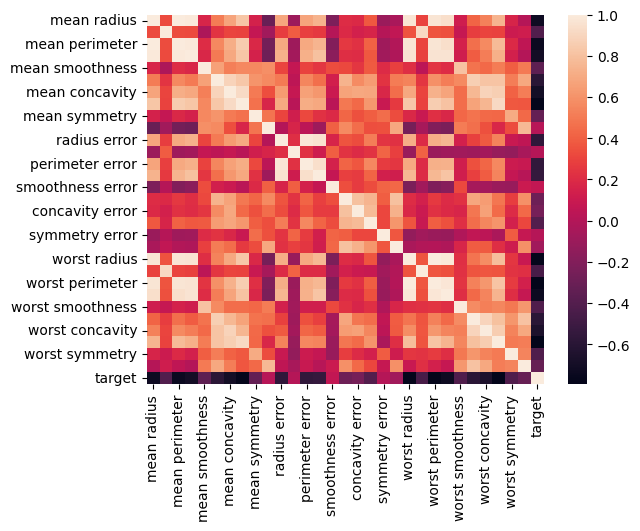

In [10]:
# This heatmap shows that correlation between features. In our case indeed we have high correlation between features like mean concave points 
# and mean concivity.
# Due to the fact that we have little instances only 569 and 30 attributes i wont remove any attribute. For a small dataset like this i wont remove 
# data and of course since its a medical data any loss can wreack havoc on the result.

import seaborn as sns
correlations= df.corr()
sns.heatmap(correlations)

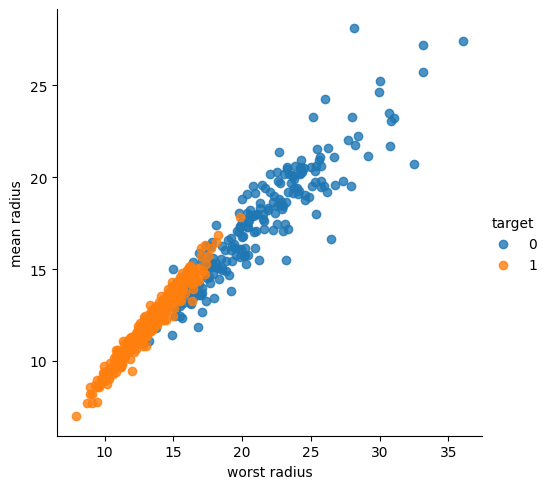

In [11]:
# Lets see two corellated attributes like mean radius and worst radius that have high correlation.It is clear that the datapoints that have 
# values less then 15  belong to the class 1.  And datapoints that have values approximately more  than 15 belong to the class 0.




sns.lmplot(data=df, y='mean radius', x='worst radius', hue='target', fit_reg=False)

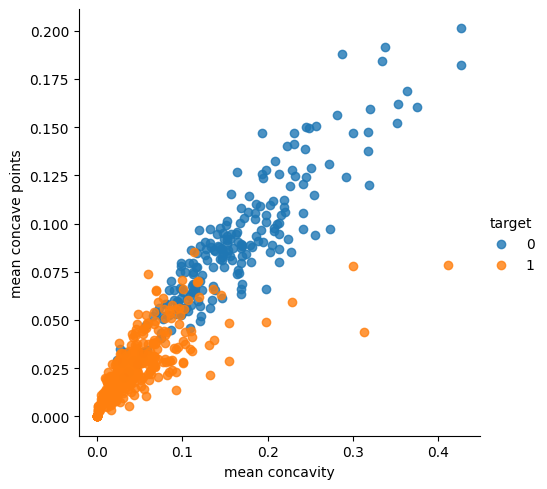

In [12]:
# Again if we examine corellated attributes mean concave points and mean concavity we can see that datapoints with low values belong to the class 1 
# and with high values to the class 0.


sns.lmplot(data=df, y='mean concave points', x='mean concavity', hue='target', fit_reg=False)

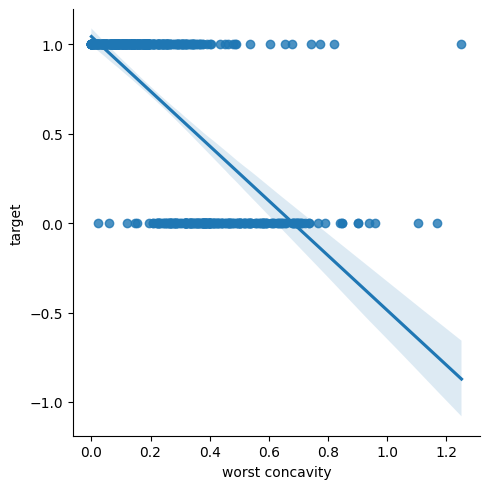

In [13]:
# From this plot we can see that the most datapoints that have low values when it comes to worst concavity belong to class 1
# Later when the values increase  from 0.6 to 0.8 most of the instances belong to class 0.

sns.lmplot(data=df, y='target', x='worst concavity')

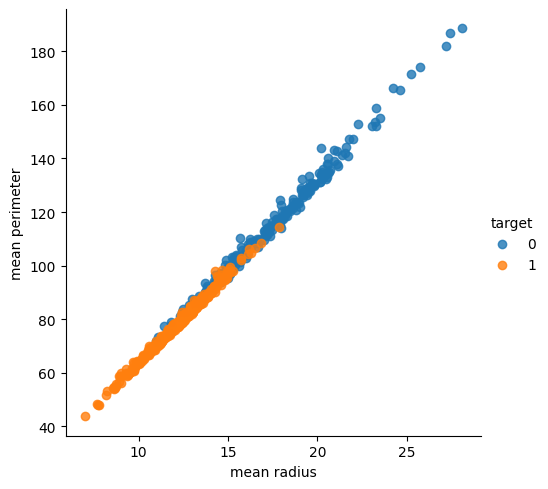

In [14]:
# Between these 2 attributes we can see their linear relation. Again lower values tend to belong to class 1 and higher values to class 0.


sns.lmplot(data=df, y='mean perimeter', x='mean radius', hue='target', fit_reg=False)

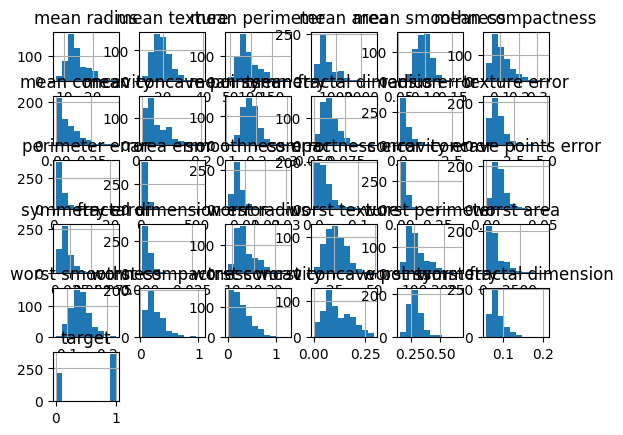

In [15]:
# Histogramms show us again the distribution of the attributes most of which is normal distribution.
# Some have the tail to the right.

import matplotlib as plt
h = df.hist()


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <

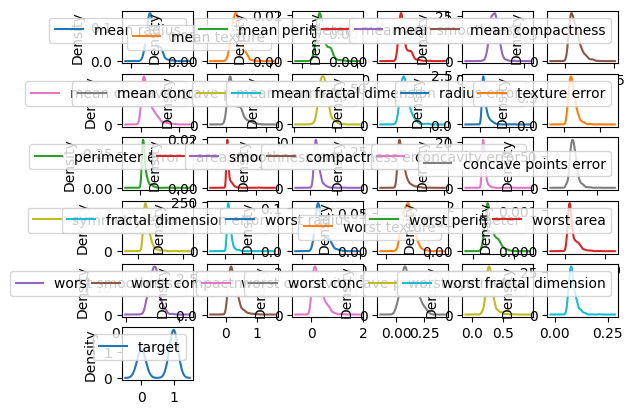

In [16]:
# From this density plot we indeed confirm the information we got from the skew that most attributes have normal distribution 
# and some of them have tail to the right.

df.plot(kind='density', subplots=True, layout=(6,6), sharex=False)

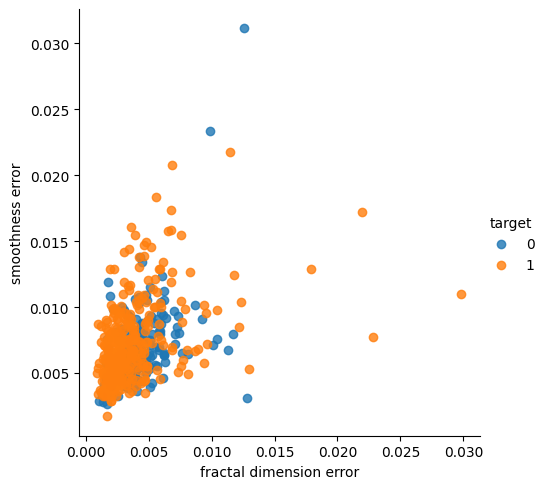

In [17]:
# From this diagramm we see that datapoints that have low value belong to both classes. Which is mormal because both attributes in general dont have 
# high values. It is difficult to find a specific value that will discetesize the class.


sns.lmplot(data=df, y='smoothness error', x='fractal dimension error', hue='target', fit_reg=False)

array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='mean texture', ylabel='mean radius'>,
        <Axes: xlabel='mean perimeter', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>,
        <Axes: xlabel='mean smoothness', ylabel='mean radius'>,
        <Axes: xlabel='mean compactness', ylabel='mean radius'>,
        <Axes: xlabel='mean concavity', ylabel='mean radius'>,
        <Axes: xlabel='mean concave points', ylabel='mean radius'>,
        <Axes: xlabel='mean symmetry', ylabel='mean radius'>,
        <Axes: xlabel='mean fractal dimension', ylabel='mean radius'>,
        <Axes: xlabel='radius error', ylabel='mean radius'>,
        <Axes: xlabel='texture error', ylabel='mean radius'>,
        <Axes: xlabel='perimeter error', ylabel='mean radius'>,
        <Axes: xlabel='area error', ylabel='mean radius'>,
        <Axes: xlabel='smoothness error', ylabel='mean radius'>,
        <Axes: xlabel='compactness error', ylabel='mea

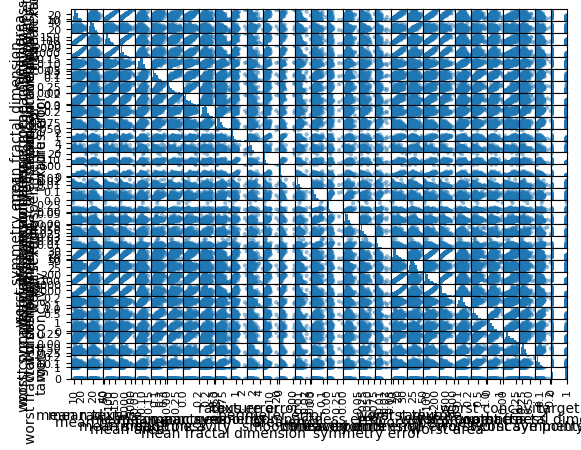

In [18]:
# The scatter matrix show us the datapoints and how they are distributed in space.Because we have many attributes a scatter matrix for all of them
# is not very informative. 

from pandas.plotting import scatter_matrix
scatter_matrix(df)


array([[<Axes: xlabel='fractal dimension error', ylabel='fractal dimension error'>]],
      dtype=object)

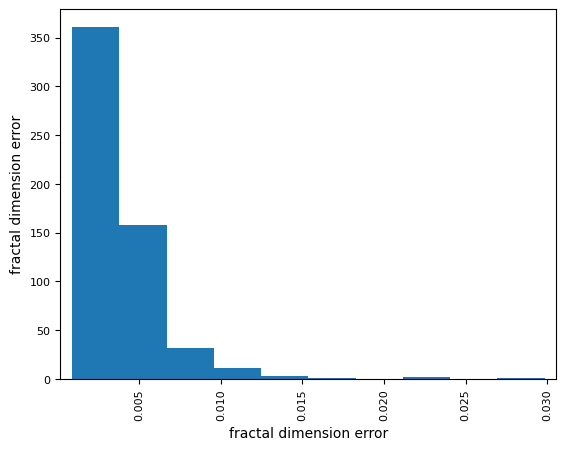

In [19]:
# For example if we take the attribute fractal dimention error we can see that most datapoints have value up to 350. 
# Some ouliers can be detected in our example values near 0.030. These datapoints differ from the rest and we can assume they are outliers.

from pandas.plotting import scatter_matrix
scatter_matrix(df[['fractal dimension error']])

array([[<Axes: xlabel='target', ylabel='target'>]], dtype=object)

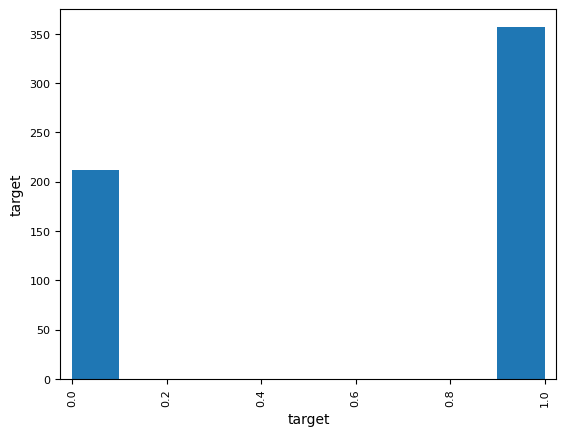

In [20]:
# Again if we see the target attribute most datapoints belong to class 1. Whitch is normal since we have known from the beginning that in class
# 1 we have slightly more instances.

from pandas.plotting import scatter_matrix
scatter_matrix(df[['target']])

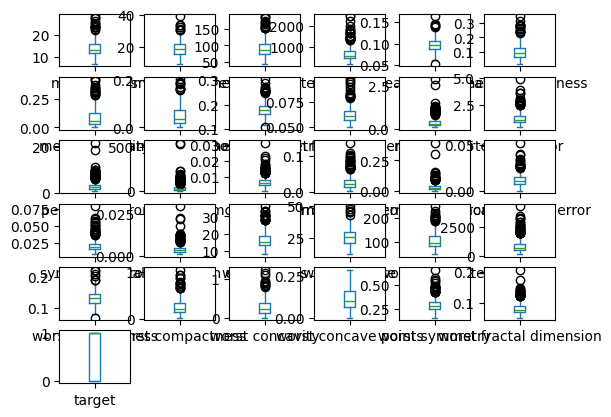

In [21]:
# Box plot show us the median, max, min,quartiles. Again it is noticible that the data is not scaled for example some boxplots 
# have high values and some very low.

bp = df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)


In [22]:
# To understand which  algorithm is the best i will use the cross validation score to see which algorithm has the best performance.
# I will use 10 splits which means that cross validation score will cut the dataset in 10 parts and will use the 9 for train and the 10th part for
# test.This actions will be repeated 10 times. And in the end the performance score is the 10 accuracies divided by 10.
# I will use shuffle and random state. I want the data to be shuffled each time before splitting  and with the random state i ensure 
# that there wont be a sequential splitting but a randomized one.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = df.values
X = array[:,0:30]
Y = array[:,30]
kfold = KFold(n_splits=10,shuffle=True, random_state=7)




In [23]:
# The first algorithm i will try is the logistic regression which is perfect for classification.The logistic regression is suitable for binary 
# classification problems class 0 or class 1. Later i will scale the data to see if better results can be achieved.As we can see the result is 0.94
# which is a very high accuracy and a very satisfying result.


from sklearn.linear_model import LogisticRegression
results = cross_val_score(LogisticRegression(solver='liblinear'), X, Y, cv=kfold)
print(results.mean()) ;

0.9455200501253133


In [24]:
# The second alorythm i will use is a KNN. The classes are created based on the neighbors.Every neighbor votes for a class as a reult a unlabeled datapoint
# will be classified based on the similarities .Each datapoint will be assighned to the most frequent class. Since in this algorithm we measure the distance
# all the attributes should be scaled because attributes with higher values will influnce the algorithm . Later i will try it on scaled data.
# Performance 0.93 is a good result.

from sklearn.neighbors import KNeighborsClassifier
results = cross_val_score(KNeighborsClassifier(), X, Y, cv=kfold)
print(results.mean())

0.9315162907268169


In [25]:
# The third algorithm i will test is the desicion trees. The leafs are the classes and the nodes are the tests for each instance.
# So far the score 0.91 is the worst performing score. 

from sklearn.tree import DecisionTreeClassifier
results = cross_val_score(DecisionTreeClassifier(), X, Y, cv=kfold)
print(results.mean())

0.9210213032581454


In [26]:
# Now i will try to scale the data into the range form 0 to 1 to see if the performance of the algorithms can be improved.


from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = df.values

A = array[:,0:30]
B = array[:,30]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(A)

kfold = KFold(n_splits=10, shuffle=True, random_state=7)

In [27]:
# Logistic regression improved its score because now the data is all in the same scale.It is logical because the logistic regression has the coefficients
# just like the normal linear regression and if the data has a big variety (very big or very small numbers) that can  influence the algorithm so we need a proper 
# scaled data. 
# New best score 0.9613 from 0.94 

from sklearn.linear_model import LogisticRegression
results = cross_val_score(LogisticRegression(solver='liblinear'), rescaledX, B, cv=kfold)
print(results.mean()) ;

0.9613721804511279


In [28]:
# The improvement of  KNN is amazing ,even though the logistic regression also improved (from 0.94 to 0.96 imrovement 0.2) the KNN imroved by 0.3 and 
# and overscored logistic regression by 0.0017. That proved the need (we saw from data observation) to rescale the data so the algorithms enhance.
# Again KNN measure the distance between neighbors, giant or small distance between attributes influence the algorithm, we cant allow some attiributes 
# dominate others.


from sklearn.neighbors import KNeighborsClassifier
results = cross_val_score(KNeighborsClassifier(), rescaledX, B, cv=kfold)
print(results.mean())

0.963095238095238


In [29]:
# Disision trees also improved but scored 0.92 which is worse than the other 2 algorithms.

from sklearn.tree import DecisionTreeClassifier
results = cross_val_score(DecisionTreeClassifier(), rescaledX, B, cv=kfold)
print(results.mean())

0.9297932330827068


In [30]:
# Now i will  split the data into train 80% of dataset and test 20% of the dataset and use it with the KNN since it is the algorithm with the 
# best performance. I will use k=5 beacuse i dont want a too small of too big k and it must be a odd number because it is a voting algorithm, 
# the neighbors will vote and we dont need a draw. The accuracy improved and now is 0.97 (37 correct in the class 0 and 74 correct in the class 1 divided by 114)
# Class 0 precision  means that indeed all predicted 0 were actually 0
# Class 0 recall means that from all actual 0 ,93% indeed were correctly identified and some were misplaced in class 1.
# Class 0 F1 score is a harmonic mean of precision and recall.
# Suport class 0 means that 40 instanses are in class 0.
# Class 1 precision means that out of all instances predicted 1 correct were 96%, some were misplaced and actually were 0.
# Class 1 recall means out of all actuall 1 ,100% were corectly identified.
# Class 1 F1 score is a harmonic mean of precision and recall.
# Suport class 1 means that 74 instanses are in class 1.
# Macro average is average between 0 and 1 class for precision, recall F1 score.


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(rescaledX, B, test_size=0.2, random_state=7)
k = 5  
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        40
         1.0       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



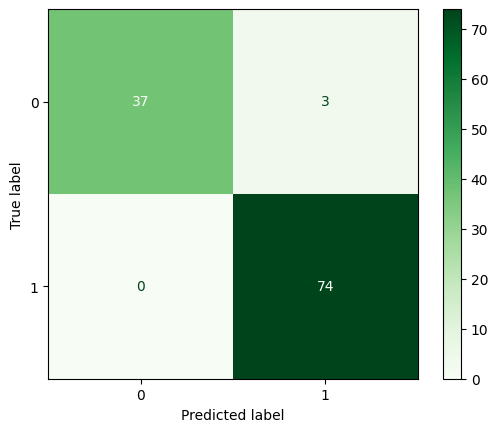

In [31]:
# From the confusion matrix we confirm all the above said about recall precision and F1. Specifically out of 40 samples that had the label 0 ,37 got  
# label 0 after prediction and 3 got label 1 (they were misplaced).Out of all the 74 instances that had label 1 they all after prediction got label 1 
# not even 1 where misplaced.


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
disp.plot(cmap='Greens')  